In [8]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [9]:
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import classifier

In [10]:
db = client.local

In [11]:
testData = db.testTweets
testTweets = []
for tweet in testData.find():
    testTweets.append({'processed_words': tweet['processed_words'],
                       'text': tweet['text']})

In [17]:
for i in range(330, 340):
    print(testTweets[i]['text'])
    print(classifier.classify(testTweets[i]['processed_words']))

@leiftheviking @sarevao @SouthwestAir I flew on Halloween morning and Southwest gate employees handed out treat bag… https://t.co/X1HmnHw5ql
neutral
@SouthwestAir can I just tell you what amazing customer service you have? Traveling with a group of 24 hs students… https://t.co/AxrpjMo8jO
positive
@SouthwestAir upset you lost my bag w all my maternity clothes we live 1.5 from the airport &amp; you wont send it to me? 👎🤰
negative
Love how @SouthwestAir crew makes an early morning flight fun with great comedy from the crew. Laughter is the best way to start the day!
positive
Shoutout to Charles and Laurel on @SouthwestAir flight 550 (SMF➡️BWI) yesterday morning. Helped to make the 3:30am… https://t.co/Sg2cHhBbSx
positive
In-flight internet is so slow at @SouthwestAir. It's just frustration and waste of money. Even @twitter takes forever to load.
negative
👋🏽 https://t.co/S07CUYFp6g
neutral
@AmericanAirlines you guys suck all around!  Gate agents are old and cranky!  Def going back to @Sout

# Most Common Place Type 

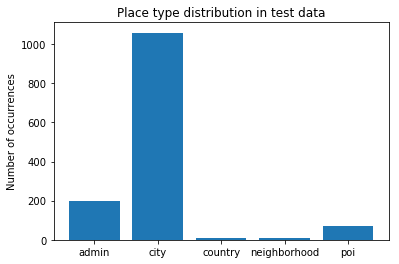

In [5]:
place_types = []
for tweet in testData.find():
    place_types.append(tweet['place_type'])
place_types = nltk.FreqDist(place_types)

places = []
frequencies = []
for place in place_types.items():
    places.append(place[0])
    frequencies.append(place[1])

x = np.arange(len(places))
y = frequencies

plt.bar(x, y)
plt.xticks(x, places)
plt.ylabel('Number of occurrences')
plt.title('Place type distribution in test data')

# Most Common Place

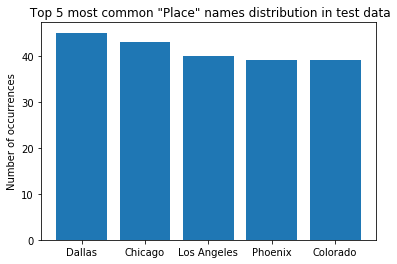

In [6]:
place_names = []
for tweet in testData.find():
    place_names.append(tweet['name'])
place_names = nltk.FreqDist(place_names)

names = []
frequencies = []
place_names = place_names.most_common(5)
for name in place_names:
    names.append(name[0])
    frequencies.append(name[1])

x = np.arange(len(names))
y = frequencies

plt.bar(x, y)
plt.xticks(x, names)
plt.ylabel('Number of occurrences')
plt.title(' Top 5 most common "Place" names distribution in test data')